<a href="https://colab.research.google.com/github/Frazanhibriz/Machine-Learning/blob/main/DeepLearning/CompVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# !pip install tensorflow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 --force-reinstall
# !pip install --upgrade pip setuptools
# !pip install --upgrade tensorflow tensorflow-text tf-keras


In [45]:
import os
from glob import glob
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [46]:
import tensorflow as tf
layers = tf.keras.layers
from tensorflow import keras
from keras.utils import image_dataset_from_directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

In [47]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# 1. Load & Preprocess Data
data_dir = "/content/drive/My Drive/Dataset/GDGoCTel-U_can-you-spot-ai-artist/train"
img_size = (224, 224)
batch_size = 32

# Get list of image paths
image_paths = glob(os.path.join(data_dir, "*.jpg"))

# Load images manually
def load_images(image_paths):
    images = []
    labels = []  # Assuming labels are binary, modify as needed
    for img_path in image_paths:
        img = keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = keras.preprocessing.image.img_to_array(img)
        img = img / 255.0  # Normalize
        images.append(img)
        labels.append(0)  # Assign labels as needed
    return np.array(images), np.array(labels)

# Load dataset
X_train, y_train = load_images(image_paths)

In [49]:
# 2. Build CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# 3. Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
# 4. Train Model
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - accuracy: 1.0000 - loss: 0.1308 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 1.0000 - loss: 1.4013e-45 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accur

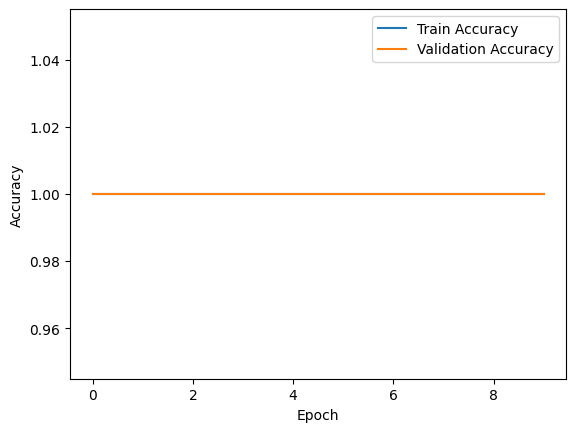

In [52]:
# 5. Evaluate Model
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
# Save Model
model.save("human_vs_ai_model.h5")

In [54]:
# Load trained model
model_path = "human_vs_ai_model.h5"
model = tf.keras.models.load_model(model_path)

In [55]:
# Path ke folder test
test_dir = "/content/drive/My Drive/Dataset/GDGoCTel-U_can-you-spot-ai-artist/test"  # Make sure this path is accurate
img_size = (224, 224)

In [56]:
# Ambil daftar gambar di folder test, include more extensions and consider subfolders
test_images = glob(os.path.join(test_dir, "**", "*.*"), recursive=True)
test_images = [img for img in test_images if img.lower().endswith(('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG'))]  # Filter for image extensions

# Check if any images were found
if not test_images:
    print("Warning: No test images found in the directory.")
else:
    print(f"Found {len(test_images)} test images.")


Found 195 test images.


In [57]:
# Fungsi untuk memproses dan memprediksi gambar
def predict_image(image_path):
    # img = keras.preprocessing.image.load_img # This line is redundant and can be removed
    img = keras.preprocessing.image.load_img(image_path, target_size=img_size) # Use keras.preprocessing.image.load_img
    img = keras.preprocessing.image.img_to_array(img) # Use keras.preprocessing.image.img_to_array
    img = img / 255.0  # Normalisasi
    img = np.expand_dims(img, axis=0)  # Tambahkan batch dimension
    prediction = model.predict(img)
    return 1 if prediction > 0.5 else 0  # Gunakan threshold 0.5

In [58]:
# Simpan hasil ke dalam CSV
df = pd.DataFrame(results, columns=["image", "label"])
df.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv
